In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

## 讀取檔案

In [2]:
df = pd.read_csv('train.csv')

## 取出連續型特徵 (方便降維)

In [3]:
df = df.select_dtypes(exclude = 'object')

## 分析缺失值

C:\Users\Watson\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


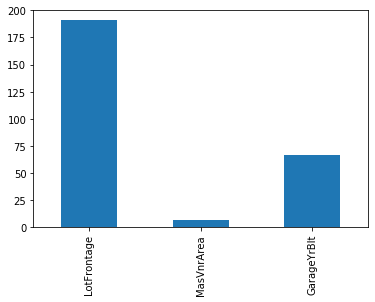

In [4]:
df_nan = df.isnull().sum()
df_nan = df_nan[df_nan > 0]
df_nan.plot('bar')

## 去除缺失值

In [5]:
df_denan = df.dropna()

## 轉化成 ndarray 後進行標準化，並將 Y 透過四分位數轉換成四個類別

In [6]:
y = df_denan['SalePrice']
df_denan.drop('SalePrice',axis=1,inplace=True)
df_np = np.array(df_denan)
df_np = (df_np - np.mean(df_np, axis=0)) / np.std(df_np, axis=0)
the_label = [0,1,2,3]
y_lab = pd.qcut(y,4,labels=the_label)
y_lab = y_lab.reset_index(drop=True)

C:\Users\Watson\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## 利用 TSNE 降維

In [7]:
tsne = TSNE(
    n_components=2, init='pca', perplexity = 40, 
    early_exaggeration = 8, learning_rate = 150,
    n_iter = 2000
)
X_tsne = tsne.fit_transform(df_np)

## 做圖

C:\Users\Watson\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  if sys.path[0] == '':


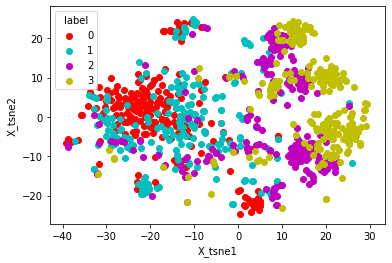

In [8]:
fig1 = plt.figure(1,figsize=(6,4))
colors = ['r','c','m','y']

for index in range(4):
    xslice = y_lab[y_lab == index].index
    plt.scatter(X_tsne[xslice,0],X_tsne[xslice,1],c=colors[index],label=y_lab) 

ax = fig1.gca()
plt.xlabel('X_tsne1')
plt.ylabel('X_tsne2')
handles,labels = ax.get_legend_handles_labels()
ax.legend(handles, labels = the_label, loc='upper left',title='label')

plt.show()

## 1. 請問同學從降維後的圖表中可以看出什麼現象？

In [9]:
#點座標重合性高

## 2. 請同學分析，什麼因素導致降維後的點座標重合性高？

In [10]:
#標準化